In [2]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import time
import numpy as np
from datetime import datetime
import yfinance as yf
import os
import glob
import regex as re
import csv
import statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
def remove_none_types(mydf):
    if mydf.isnull().values.any():
        return False
    else:
        return True

X_data = []
Y_data = []

sectors = ["automobiles", "banks"]
for sector in sectors:
    filelist = os.listdir("sectors/"+sector)
    try:
        filelist.remove('.DS_Store')
    except:
        pass

    for stock in filelist:
        sector_files = glob.glob('sectors/'+str(sector)+'/'+str(stock)+'/'+str(stock)+'20*[0-9]**[0-9]*[1-4].*')
        sector_files.sort(reverse=True)

        testpath = sector_files[0]
        testdata_from_csv = pd.read_csv(testpath)
        try:
            market_cap = float(testdata_from_csv.iloc[[-1]].values[0][0])
            if (market_cap > 1000000000):
                for i in range(0, len(sector_files)): # for every .csv path of that stock
                    path = sector_files[i]
                    data_from_csv = pd.read_csv(path)
                    Checks_None = remove_none_types(data_from_csv)
                    if (Checks_None == True):
                        single_X_data = (np.array((data_from_csv[3:73].astype(float))).flatten()) 
                        if (single_X_data.shape[0]) == 70:
                            X_data.append(single_X_data)
                            single_Y_data = np.array(data_from_csv[85:95].astype(float)).flatten()
                            Y_data.append(single_Y_data)
        except:
            pass
                

#[
#   [#AAPL
#       [ [earnings call 1], [earnings call 2], [earnings call 3]
#   ],
#   [#MSFT
#       [ [earnings call 1], [earnings call 2], [earnings call 3]
#   ]
#
# ]



X_data = np.array(X_data)
Y_data = np.array(Y_data)
Y_data = Y_data[:,4]
# # Y_data = Y_data[:,8]



In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Starting off with random forest classifer 
rfc = RandomForestClassifier(max_depth=1000, n_estimators=1000)

rfc.fit(X_train, Y_train)
score = rfc.score(X_test, Y_test)
Y_pred = rfc.predict(X_test)

print(metrics.classification_report(Y_test, Y_pred))

/var/folders/dr/g848f5b55mn9xp6p982hbg280000gn/T/ipykernel_40991/605187953.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


              precision    recall  f1-score   support

           0       0.83      1.00      0.91       522
           1       0.00      0.00      0.00       105

    accuracy                           0.83       627
   macro avg       0.42      0.50      0.45       627
weighted avg       0.69      0.83      0.76       627



/Users/victor/miniforge3/envs/NLP_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/victor/miniforge3/envs/NLP_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/victor/miniforge3/envs/NLP_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [16]:
print(X_data.shape)
print(Y_data.shape)

(1900, 70)
(1900,)


In [15]:
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
X_data


array([[ 1.31248374e-03,  9.01261248e-01,  9.11728133e-01, ...,
        -6.04444415e-01, -7.44557054e-01, -2.81345587e-01],
       [ 1.64222224e-02,  4.07735393e-01,  5.31221572e-01, ...,
        -6.04444415e-01, -7.44557054e-01, -2.81345587e-01],
       [ 8.70001129e-03,  2.84352155e-01,  4.66117495e-01, ...,
        -6.04444415e-01, -7.44557054e-01, -2.81345587e-01],
       ...,
       [-8.00967809e-03, -3.34617059e-01, -2.90857535e-01, ...,
        -1.09060439e+00, -7.44557054e-01,  1.35970205e+00],
       [-2.54862182e-03, -8.83991825e-01, -5.21770259e-01, ...,
         1.47432695e+00,  1.73340212e+00,  6.13771308e-01],
       [-2.96493553e-03, -4.62326567e-02,  3.84284840e-02, ...,
         1.03138049e+00,  9.59039877e-01, -2.81345587e-01]])

In [15]:
Y_data

array([ 0.23289604, -0.13685962,  0.40832962, ...,  0.06799316,
       -0.01983425,  0.06820767])

In [30]:
Y_dataCOPY = Y_data.copy()
df = pd.DataFrame(Y_dataCOPY)


# df[0] = np.where(df[0] < -0.4, -2,
#     np.where((df[0] >= -0.4) & (df[0] < -0.07), -1,
#     np.where((df[0] >= -0.07) & (df[0] <= 0.07), 0,
#     np.where((df[0] > 0.07) & (df[0] <= 0.4), 1, 2))))

df[0] = np.where(df[0] < 0.15, 0, 1)

    
Y_data_update = df.to_numpy()

print(Y_data_update.shape)


(1900, 1)


In [4]:
Y_dataCOPY = Y_data.copy()
X_dataCOPY = X_data.copy()
df = pd.DataFrame(Y_dataCOPY)
dfX = pd.DataFrame(X_dataCOPY)


# df[0] = np.where(df[0] < -0.4, -2,
#     np.where((df[0] >= -0.4) & (df[0] < -0.07), -1,
#     np.where((df[0] >= -0.07) & (df[0] <= 0.07), 0,
#     np.where((df[0] > 0.07) & (df[0] <= 0.4), 1, 2))))

df[0] = np.where(df[0] < -0.3, -1,
    np.where((df[0] >= -0.3) & (df[0] < 0.3), 0,
    np.where(df[0] >= 0.3, 1, df[0])))
    
Y_data_update = df.to_numpy()
X_data_update = dfX.to_numpy()

print(Y_data_update.shape)
print(X_data_update.shape)


(1703, 1)
(1703, 82)


In [5]:
print(Y_data_update.shape)
print(X_data_update.shape)


(1703, 1)
(1703, 82)


In [31]:

# scaler = StandardScaler()
# X_data_update = scaler.fit_transform(X_data_update)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data_update, test_size=0.33, random_state=42)
Y_train.shape

(1273, 1)

2023-02-08 10:19:33.644560: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-08 10:19:33.644709: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-08 10:19:33.823176: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-08 10:19:34.020950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 3ms/step


2023-02-08 10:19:34.742151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


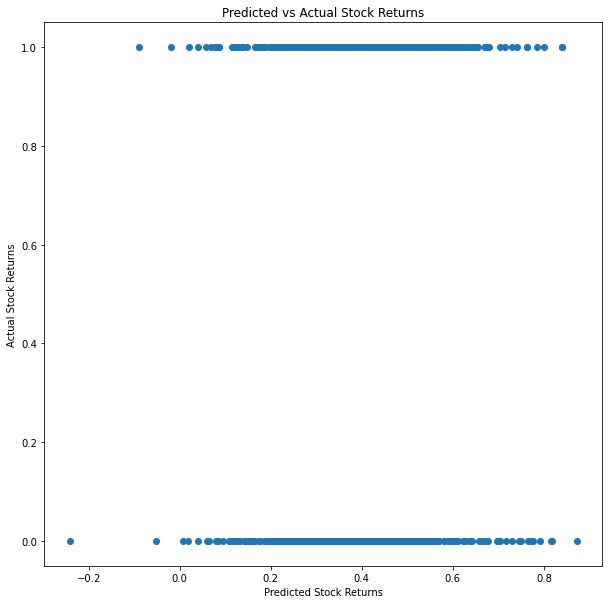

In [9]:
model = Sequential()
model.add(Dense(128, input_shape=(82,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('tanh'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred, Y_test)
plt.ylabel("Actual Stock Returns")
plt.xlabel("Predicted Stock Returns")
plt.title("Predicted vs Actual Stock Returns")
plt.show()



/Users/victor/miniforge3/envs/NLP_env/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error:  0.25218485409441105
R2 Score:  -0.02501167785283287


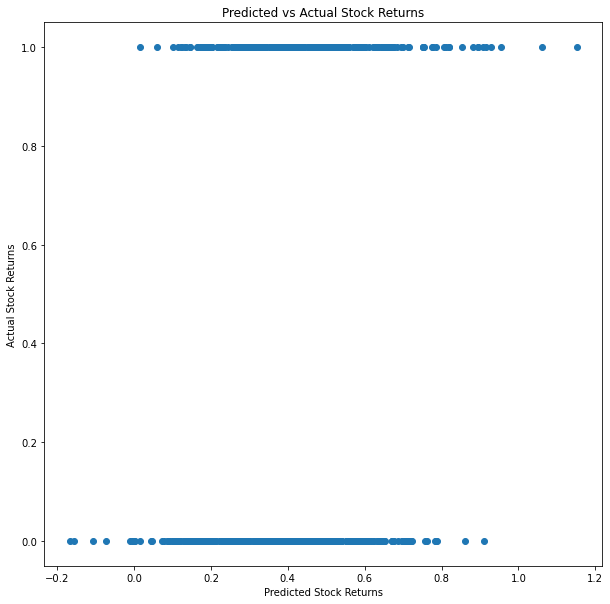

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the gradient boosting regressor
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=2,
    loss='squared_error',
    random_state=42
)

# Fit the regressor to the training data
gbr.fit(X_train, Y_train)

# Predict stock returns for the testing data
Y_pred = gbr.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("R2 Score: ", r2_score(Y_test, Y_pred))

plt.figure(figsize=(10,10))
plt.scatter(Y_pred, Y_test)
plt.ylabel("Actual Stock Returns")
plt.xlabel("Predicted Stock Returns")
plt.title("Predicted vs Actual Stock Returns")
plt.show()



/var/folders/dr/g848f5b55mn9xp6p982hbg280000gn/T/ipykernel_40991/3087096297.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


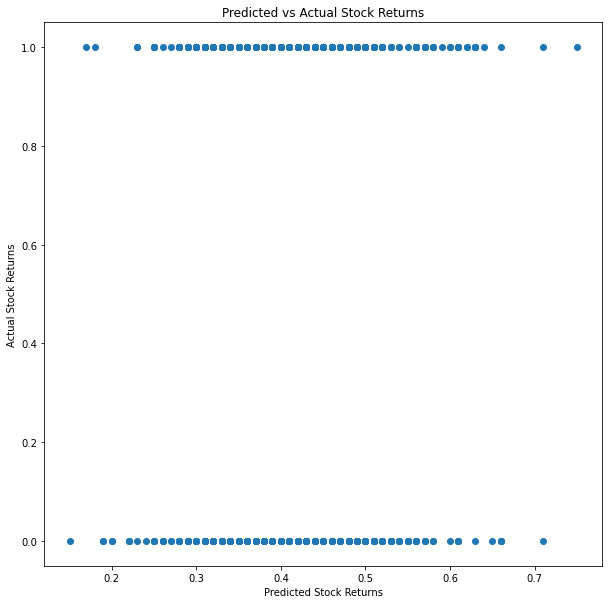

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest Regressor on the training data
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)

# Predict the stock returns on the testing data
Y_pred = rf.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred, Y_test)
plt.ylabel("Actual Stock Returns")
plt.xlabel("Predicted Stock Returns")
plt.title("Predicted vs Actual Stock Returns")
plt.show()


Mean Squared Error: 0.04206753843050262


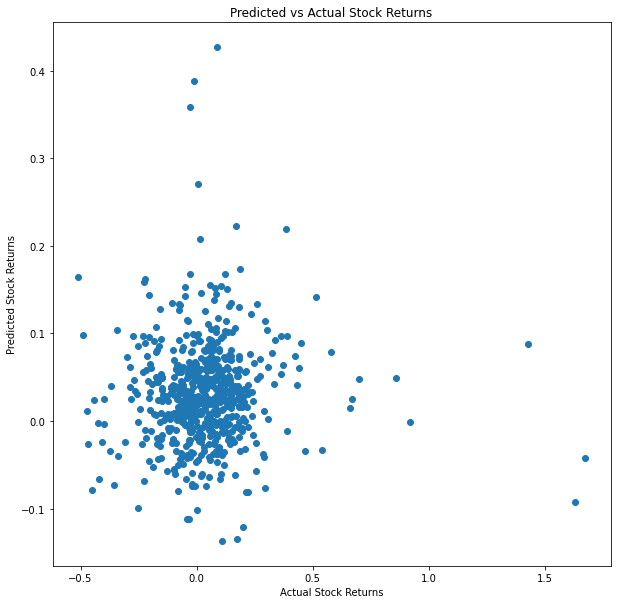

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
sX_train, sX_test, sy_train, sy_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)

# Convert training and testing data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(sX_train, label=sy_train)
dtest = xgb.DMatrix(sX_test, label=sy_test)

# Define hyperparameters for the XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.8,    
    'n_jobs': -1,
    'random_state': 42
}

# Train the XGBoost model on the training data
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test data
sy_pred = model.predict(dtest)

# Calculate the mean squared error
mse = mean_squared_error(sy_test, sy_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

import matplotlib.pyplot as plt

# Plot the predicted vs actual stock returns
plt.figure(figsize=(10,10))
plt.scatter(sy_test, sy_pred)
plt.xlabel("Actual Stock Returns")
plt.ylabel("Predicted Stock Returns")
plt.title("Predicted vs Actual Stock Returns")
plt.show()



Epoch 1/50


2023-02-07 19:04:12.599966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0438

2023-02-07 19:04:13.880124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 35ms/step - loss: 0.0000e+00 - accuracy: 0.0438 - val_loss: 0.0000e+00 - val_accuracy: 0.0409
Epoch 2/50
36/36 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0438 - val_loss: 0.0000e+00 - val_accuracy: 0.0409
Epoch 3/50
36/36 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - accuracy: 0.0438 - val_loss: 0.0000e+00 - val_accuracy: 0.0409
Epoch 4/50
36/36 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0438 - val_loss: 0.0000e+00 - val_accuracy: 0.0409
Epoch 5/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - accuracy: 0.0438 - val_loss: 0.0000e+00 - val_accuracy: 0.0409
Epoch 6/50
36/36 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - accuracy: 0.0438 - val_loss: 0.0000e+00 - val_accuracy: 0.0409
Epoch 7/50
36/36 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0438 - val_loss: 0.

2023-02-07 19:04:54.997485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


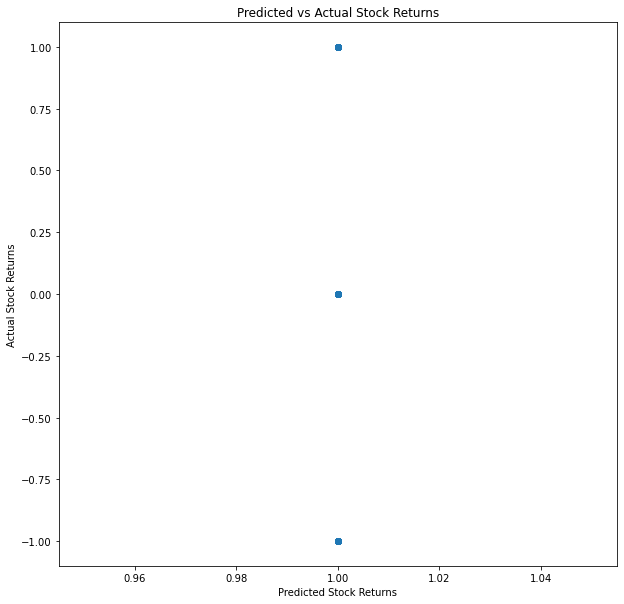

In [12]:
model = Sequential()

# Add the first hidden layer with 128 units and ReLU activation
model.add(Dense(250, activation='relu', input_shape=(X_train.shape[1],)))

# Add a dropout layer with a rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

model.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dropout(0.5))

model.add(Dense(160, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dropout(0.5))

model.add(Dense(120, activation='relu', input_shape=(X_train.shape[1],)))

# Add the second hidden layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add a dropout layer with a rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
# Add the output layer with a single unit and a linear activation
model.add(Dense(1, activation='softmax'))

# Compile the model with mean squared error loss and the Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

Y_pred = model.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred, Y_test)
plt.ylabel("Actual Stock Returns")
plt.xlabel("Predicted Stock Returns")
plt.title("Predicted vs Actual Stock Returns")
plt.show()


Epoch 1/100
 8/40 [=====>........................] - ETA: 0s - loss: 0.2739 

2023-02-08 10:20:41.218131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 14ms/step - loss: 0.2653 - val_loss: 0.2649
Epoch 2/100
10/40 [======>.......................] - ETA: 0s - loss: 0.2536

2023-02-08 10:20:41.788906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 9ms/step - loss: 0.2435 - val_loss: 0.2588
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 0.2329 - val_loss: 0.2569
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 0.2242 - val_loss: 0.2562
Epoch 5/100
40/40 [==============================] - 0s 9ms/step - loss: 0.2165 - val_loss: 0.2570
Epoch 6/100
40/40 [==============================] - 0s 9ms/step - loss: 0.2103 - val_loss: 0.2572
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 0.2041 - val_loss: 0.2599
Epoch 8/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1994 - val_loss: 0.2606
Epoch 9/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1936 - val_loss: 0.2632
Epoch 10/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1885 - val_loss: 0.2653
Epoch 11/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1837 - val_loss: 0.2653
Epoch 12/100
40/40 [

2023-02-08 10:21:11.773504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


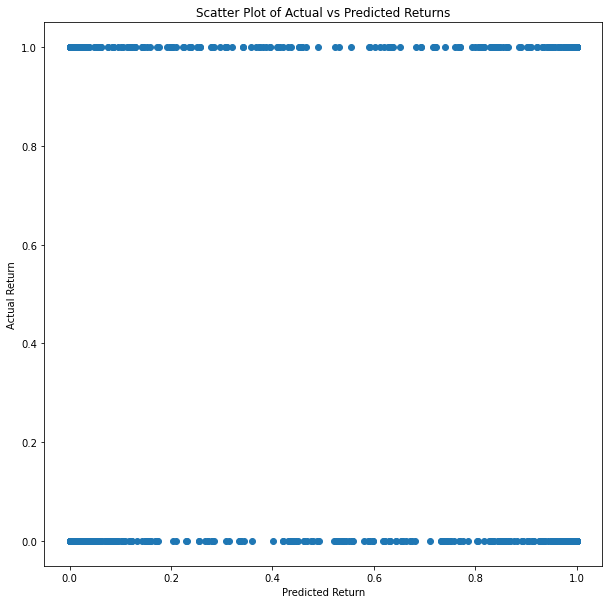

In [13]:
model = Sequential()
model.add(Dense(32, input_dim=82, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(Y_pred, Y_test)
plt.ylabel('Actual Return')
plt.xlabel('Predicted Return')
plt.title('Scatter Plot of Actual vs Predicted Returns')
plt.show()

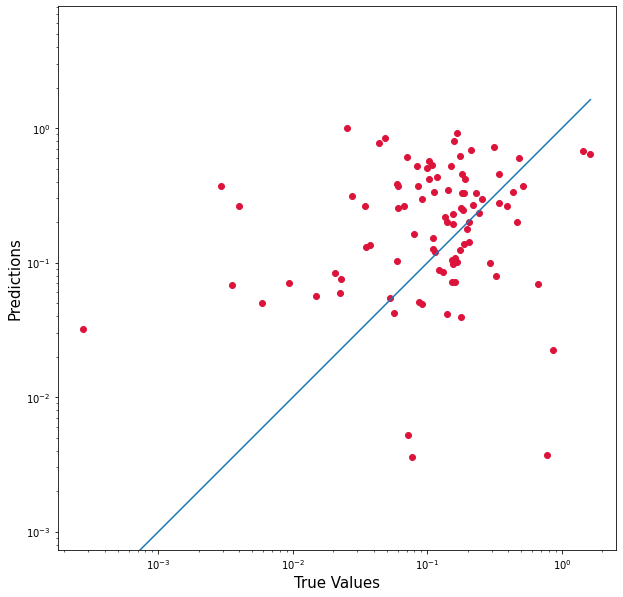

In [715]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([0, p1], [0, p1])
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

MSE: 1.02
R2: -0.00


/Users/victor/miniforge3/envs/NLP_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


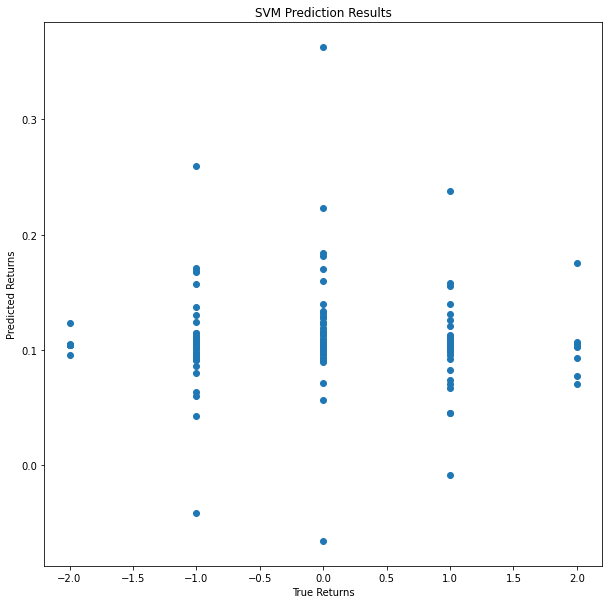

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
model = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.2, tol=0.001, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

# Plot the predictions against the actual returns
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Returns")
plt.ylabel("Predicted Returns")
plt.title("SVM Prediction Results")
plt.show()

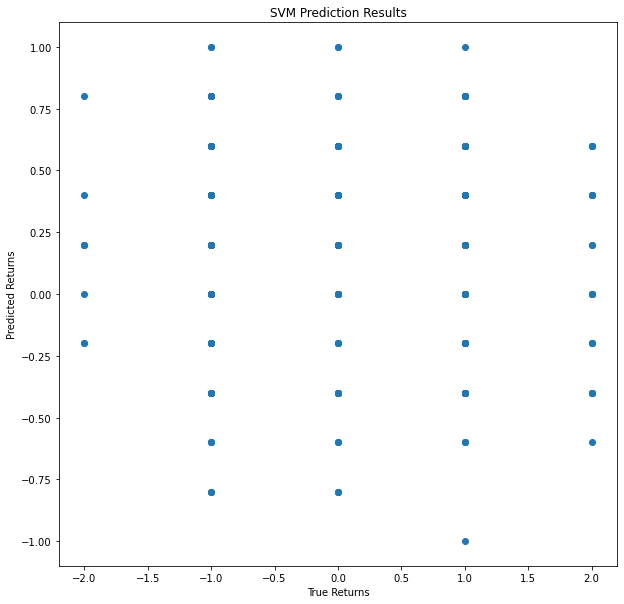

In [24]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
# mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

# Plot the predictions against the actual returns
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Returns")
plt.ylabel("Predicted Returns")
plt.title("SVM Prediction Results")
plt.show()

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt




Epoch 1/100


2023-02-07 17:31:51.302247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 41ms/step - loss: 10.8878 - mse: 1.2637 - val_loss: 0.3814 - val_mse: 1.0045
Epoch 2/100
 1/17 [>.............................] - ETA: 0s - loss: 8.1379 - mse: 0.8152

2023-02-07 17:31:52.116228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 0s 19ms/step - loss: 1.0446 - mse: 1.1193 - val_loss: 0.6174 - val_mse: 1.0299
Epoch 3/100
17/17 [==============================] - 0s 18ms/step - loss: -0.1494 - mse: 1.0537 - val_loss: 1.0680 - val_mse: 1.0343
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 9.5311 - mse: 1.0474 - val_loss: 0.6319 - val_mse: 1.0296
Epoch 5/100
17/17 [==============================] - 0s 17ms/step - loss: 2.7768 - mse: 1.0704 - val_loss: 0.4758 - val_mse: 1.0217
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 4.1851 - mse: 1.0728 - val_loss: 0.4292 - val_mse: 1.0148
Epoch 7/100
17/17 [==============================] - 0s 16ms/step - loss: 2.9186 - mse: 1.0860 - val_loss: 0.4844 - val_mse: 1.0371
Epoch 8/100
17/17 [==============================] - 0s 18ms/step - loss: 2.1880 - mse: 1.0888 - val_loss: 0.5532 - val_mse: 1.0698
Epoch 9/100
17/17 [==============================] - 0s 17ms/step - loss: 0.6504 - mse:

2023-02-07 17:32:21.297175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


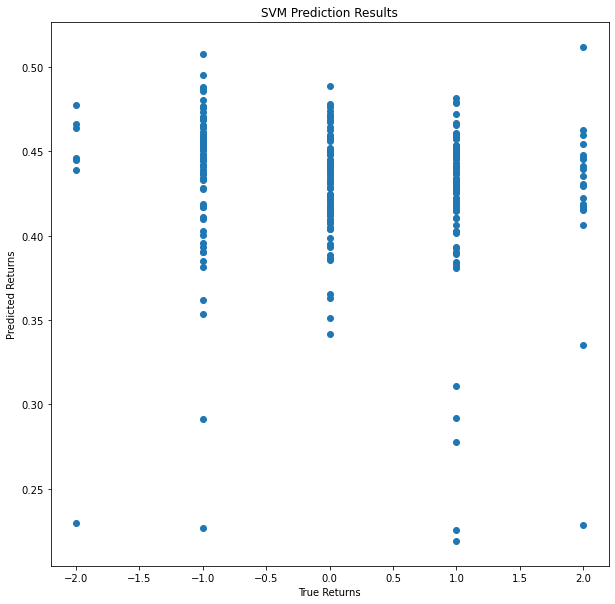

In [21]:
#DECENT MODEL!

model = Sequential()

# Add multiple hidden layers with different number of neurons
model.add(Dense(256, activation='relu', input_shape=(82,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.8))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Y_pred = model.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Returns")
plt.ylabel("Predicted Returns")
plt.title("SVM Prediction Results")
plt.show()

In [ ]:
regr = DecisionTreeRegressor(random_state=0)


In [592]:
from sklearn.metrics import classification_report

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Convert predictions to binary format (0 or 1)
Y_pred = np.round(Y_pred)

# Generate classification report
print(classification_report(Y_test, Y_pred))


9/9 [==============================] - 0s 4ms/step


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [694]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics

rfc = RandomForestClassifier(n_estimators=1000)

rfc.fit(X_train, Y_train)
score = rfc.score(X_test, Y_test)
Y_pred = rfc.predict(X_test)

print(metrics.classification_report(Y_test, Y_pred))


ValueError: Unknown label type: 'continuous'

In [222]:
from sklearn.metrics import fbeta_score


f2_score = fbeta_score(Y_test, Y_pred, beta=2, average='macro')
print('F2 score: ', f2_score)

F2 score:  0.9126984126984127


In [82]:
new_Y_data = []

In [76]:
# 0.05232749576968998
arr = [[2,3,4], [5,None,3]]
a = remove_none_types(Y_data)
# print(a)

                     2022
85  -0.051724136025191325
86   -0.02390602690140997
87    -0.1525644085301101
88    0.05288324693428659
89    0.14358163060132378
90   0.022336775697576527
91                    NaN
92   -0.08637918235815045
93     0.1351140577858143
94    0.23289603942402248
                     2022
85    0.23308270676691722
86  0.0010526269898378793
87   -0.06075189346657661
88   -0.06781952363207822
89    0.01097749408922688
90   0.052766730550235286
91   -0.14533315937255797
92   -0.19809988992279315
93    -0.2041340073921576
94    -0.1368596240370693
                     2022
85  -0.030644177262782568
86    0.07629768093131739
87   0.009589307333061514
88    0.16447778171502803
89      0.332290978133841
90   0.024680451862564956
91    0.13772586718582858
92    0.06721020637444464
93     0.2309387240098537
94    0.40832962413296126
                    2021
85  -0.15756704419921852
86  -0.17900078028648514
87  -0.32570602005055616
88  -0.34482259697285966
89   -0.247212204